## Analyse properties of the particle's positions.

In [1]:
import numpy as numpy
import xarray as xr
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

import sys
sys.path.append(str(Path.cwd().parent))
import scripts.ensemble_predictions as reslib
PATH = Path.cwd().parent

In [11]:
def make_plots(geom, dim, N, alpha, mask_zero=False, savefig=False):
    data = reslib.load_result(PATH, geom, dim, alpha, N)

    fig, axes = plt.subplots(ncols=3, figsize=(15,6), sharex=True, sharey=True)

    h = np.asarray(data.h)
    diagonal       = np.average(data.loc["diagonal"] , axis=-1)
    canonical      = np.average(data.loc["canonical"], axis=-1)
    microcanonical = np.average(data.loc["micro"]    , axis=-1)


    mask_text = " (zero masked)" if mask_zero else ""
    save_text = "_zero_masked" if mask_zero else ""
    if mask_zero:

        mask = (h != 0)

        h = h[mask]
        diagonal = diagonal[:,mask]
        microcanonical = microcanonical[:,mask]
        canonical = canonical[:,mask]

    axes[0].plot(h, diagonal.T)
    axes[0].set_title("Diagonal ensemble")
    axes[0].set_ylabel("$\\langle S_x \\rangle$")
    axes[0].axhline(0, linestyle=":", color="black")

    axes[1].plot(h, microcanonical.T)
    axes[1].set_title("Microcanonical ensemble")
    axes[1].axhline(0, linestyle=":", color="black")

    lines = axes[2].plot(h, canonical.T)
    axes[2].set_title("Canonical ensemble")
    axes[2].axhline(0, linestyle=":", color="black")

    fig.suptitle(f"{geom} {dim}d with $N={N}$ $\\alpha = 3${mask_text}", fontsize=20)
    fig.legend(lines, [str(float(r)) for r in data.rho], loc="right")
    fig.tight_layout()
    if savefig:
        fig.savefig(f"/home/adrian/Documents/workspace/heisensim/gfx/{geom}_{dim}d_N_{N}_alpha_{alpha}{save_text}.png")
    return fig


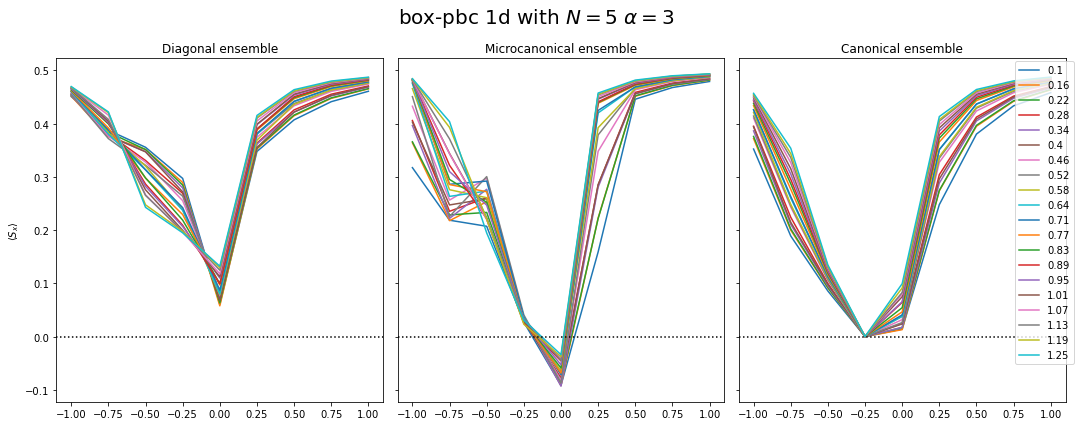

In [13]:
make_plots("box-pbc", 1, 5, 3).show()

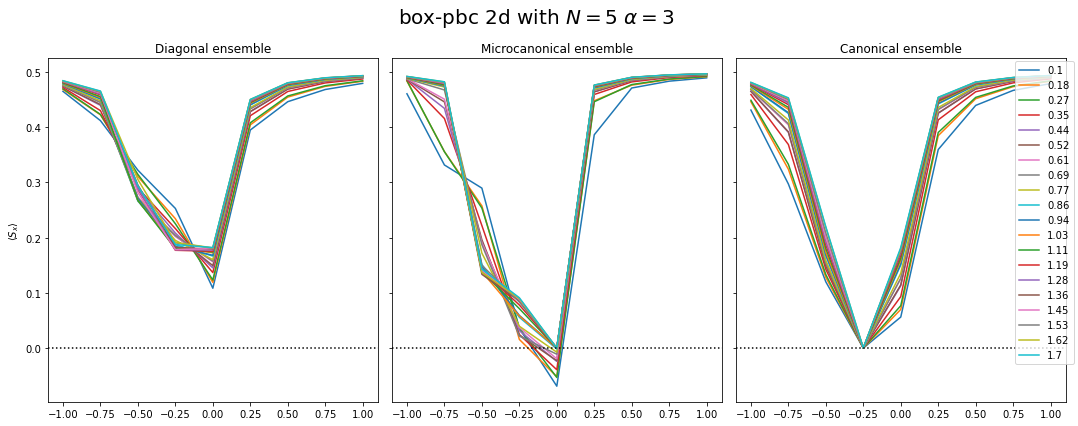

In [14]:
make_plots("box-pbc", 2, 5, 3).show()

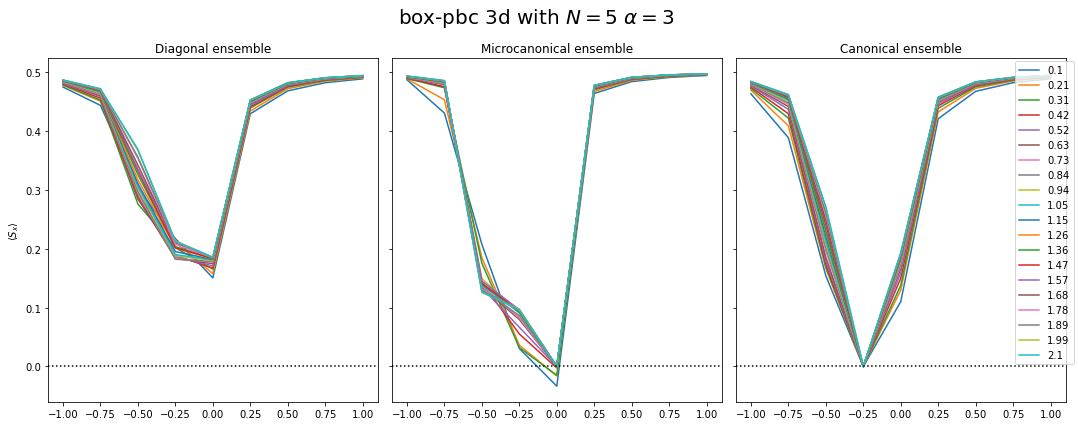

In [15]:
make_plots("box-pbc", 3, 5, 3).show()

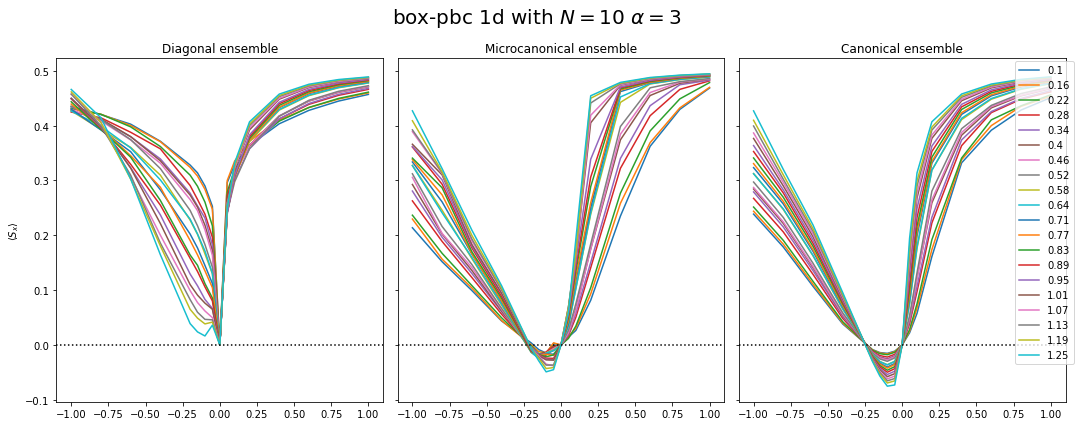

In [16]:
make_plots("box-pbc", 1, 10, 3).show()

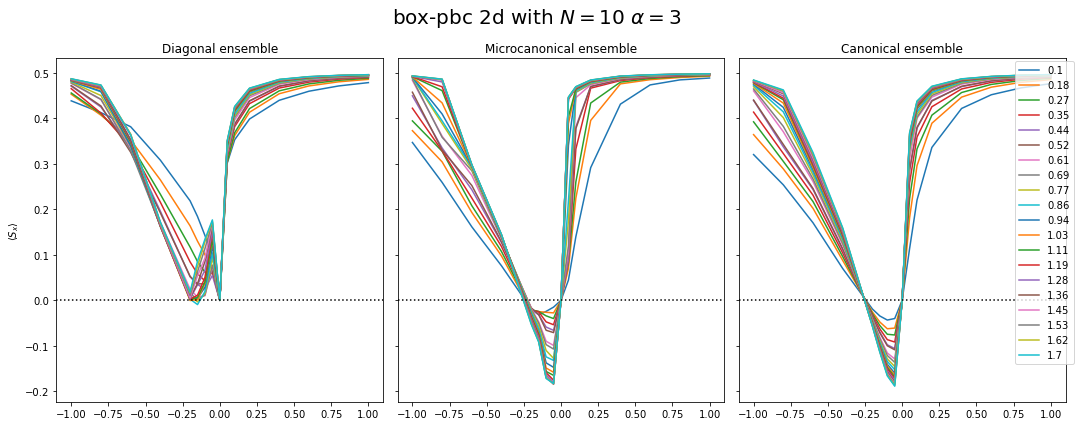

In [17]:
make_plots("box-pbc", 2, 10, 3).show()

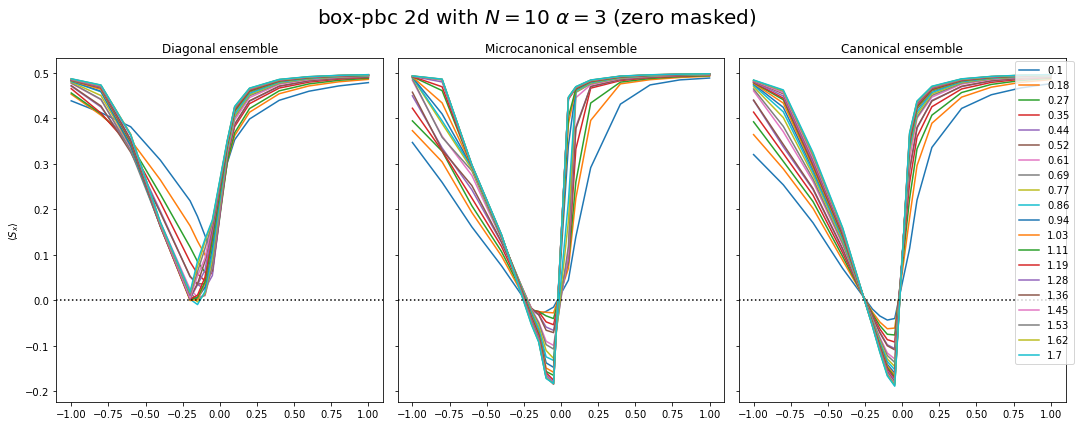

In [18]:
make_plots("box-pbc", 2, 10, 3, mask_zero=True).show()